In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt

Import all datasets

In [7]:
d13 = pd.read_stata('./data/2013', convert_categoricals=False)
d14 = pd.read_stata('./data/2014', convert_categoricals=False)
d15 = pd.read_stata('./data/2015', convert_categoricals=False)
d16 = pd.read_stata('./data/2016', convert_categoricals=False)
d17 = pd.read_stata('./data/2017', convert_categoricals=False)
d18 = pd.read_stata('./data/2018', convert_categoricals=False)
d19 = pd.read_stata('./data/2019', convert_categoricals=False)
d20 = pd.read_stata('./data/2020', convert_categoricals=False)
d21 = pd.read_stata('./data/2021', convert_categoricals=False)
d22 = pd.read_stata('./data/2022', convert_categoricals=False)

Recode pre-2017 LFSSTAT variables

In [8]:
pre = pd.concat([d13, d14, d15, d16])

def recode(LFSSTAT):
	if LFSSTAT == 4:
		return 3
	elif LFSSTAT == 5:
		return 3
	elif LFSSTAT == 6:
		return 4
	else:
		return LFSSTAT

pre['LFSSTAT'] = pre['LFSSTAT'].apply(recode)

Append the rest of the data to the master

In [9]:
post = pd.concat([d17, d18, d19, d20, d21, d22])
master = pd.concat([pre, post])

QUESTION 1

1a - How many observations are there?

In [10]:
master['SURVYEAR'].value_counts().sort_index()

2013    104170
2014    104330
2015    100303
2016    103235
2017    103752
2018    102794
2019    101343
2020     87779
2021     87573
2022    111740
Name: SURVYEAR, dtype: int64

QUESTION 2

2a - Compute the labour force participation based on the “LFSSTAT” variable, overall and separately by year. 

In [11]:
LFPRD = pd.crosstab(master['SURVYEAR'], master['LFSSTAT'], margins=True)
LFPR = (LFPRD[1] + LFPRD[2] + LFPRD[3]) / LFPRD['All']
LFPR

SURVYEAR
2013    0.658462
2014    0.652391
2015    0.653590
2016    0.648230
2017    0.651371
2018    0.647839
2019    0.647425
2020    0.622586
2021    0.622863
2022    0.631403
All     0.644148
dtype: float64

2b - Compute the labour force participation for men and women based on the “LFSSTAT” variable, oversall and separately by years.

In [12]:
males = master[master['SEX'] == 1]
females = master[master['SEX'] == 2]

Males

In [13]:
LFPRDm = pd.crosstab(males['SURVYEAR'], males['LFSSTAT'], margins=True)
LFPRm = (LFPRDm[1] + LFPRDm[2] + LFPRDm[3]) / LFPRDm['All']
LFPRm

SURVYEAR
2013    0.708689
2014    0.701952
2015    0.706169
2016    0.694513
2017    0.695485
2018    0.693028
2019    0.693011
2020    0.669626
2021    0.665381
2022    0.672255
All     0.690535
dtype: float64

Females

In [14]:
LFPRDf = pd.crosstab(females['SURVYEAR'], females['LFSSTAT'], margins=True)
LFPRf = (LFPRDf[1] + LFPRDf[2] + LFPRDf[3]) / LFPRDf['All']
LFPRf

SURVYEAR
2013    0.611078
2014    0.605587
2015    0.604040
2016    0.604596
2017    0.609573
2018    0.605046
2019    0.604422
2020    0.578036
2021    0.582758
2022    0.592897
All     0.600343
dtype: float64

2d - Table the participation variable by education for all years together and without separating by gender. For the education variable use “EDUC”.

In [15]:
LFPRDe = pd.crosstab(master['EDUC'], master['LFSSTAT'], margins=True)
LFPRe = (LFPRDe[1] + LFPRDe[2] + LFPRDe[3]) / LFPRDe['All']
LFPRe

EDUC
0.0    0.227290
1.0    0.435972
2.0    0.617459
3.0    0.684808
4.0    0.694530
5.0    0.755551
6.0    0.757659
All    0.637896
dtype: float64

QUESTION 3

3a - Conditional on working, do men and women show similar labour supply patterns? Compare the hours of work supplied in a week by men and women. Use UHRSMAIN as the hours worked variable.


In [16]:
males['UHRSMAIN'].describe()

count    314711.000000
mean         39.247591
std          11.965317
min           0.100000
25%          37.500000
50%          40.000000
75%          40.000000
max          99.000000
Name: UHRSMAIN, dtype: float64

In [17]:
females['UHRSMAIN'].describe()

count    292246.000000
mean         33.237844
std          11.154929
min           0.100000
25%          29.000000
50%          37.000000
75%          40.000000
max          99.000000
Name: UHRSMAIN, dtype: float64

3b - Illustrate in a histogram. Use UHRSMAIN as the hours worked variable. Interpret any findings related to the distribution of hours worked by gender. 

In [27]:
hrsMales = males[males['UHRSMAIN'] >= 0]
hrsFemales = females[females['UHRSMAIN'] >= 0]

<AxesSubplot: >

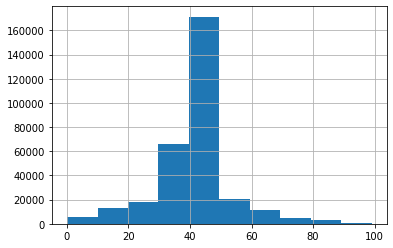

In [37]:
hrsMales['UHRSMAIN'].hist(bins=10)

<AxesSubplot: >

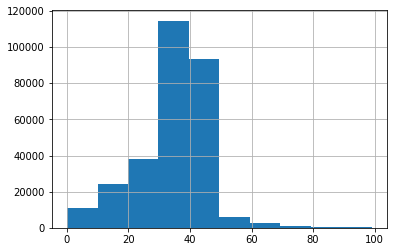

In [68]:
hrsFemales['UHRSMAIN'].hist(bins=10)

3c - Tabulate the average hours worked by education level for men

In [54]:
avgMaleHRS = hrsMales.groupby('EDUC').mean()
avgMaleHRS['UHRSMAIN']

EDUC
0.0    39.820034
1.0    35.764868
2.0    39.791675
3.0    35.995281
4.0    40.328921
5.0    38.514599
6.0    38.334204
Name: UHRSMAIN, dtype: float64

3e - Tabulate hours worked by education level for women

In [55]:
avgFemaleHRS = hrsFemales.groupby('EDUC').mean()
avgFemaleHRS['UHRSMAIN']

EDUC
0.0    30.629449
1.0    26.012854
2.0    32.991672
3.0    30.647688
4.0    34.063611
5.0    34.509396
6.0    35.261259
Name: UHRSMAIN, dtype: float64